# Pleiotropy graphs

## Setup

Importing required libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

Importing configuration variables & helper functions from a local file

In [53]:
#importlib code just for debugging : to allow changes in graphing_config to 
#reflect here. It can be removed if you are not making changes to graphing_config

import importlib ##can remove
import graphing_config as GC
importlib.reload(graphing_config) ##can remove

<module 'graphing_config' from '/gpfs/gibbs/pi/reilly/VariantEffects/scripts/noon_scripts/4.graphs/graphing_config.py'>

## CADD vs pleiotropy

Load data

In [62]:
cadd_pleio = pd.read_csv(glob.glob(GC.data_base_path+"CADD_pleio/*.csv")[0])

Convert multiple boolean columns to single categorical column

In [63]:
cadd_pleio['CADD_category'] = cadd_pleio.apply(GC.find_true_column, columns=GC.CADD_cata, default=GC.CADD_default, axis=1)

Define a function to plot CADD vs pleiotropy

In [72]:
cadd_pleio.groupby(["pleio","CADD_category"])["count"].sum().reset_index()
#cadd_pleio

,pleio,CADD_category,count
0,0,CADD<10,395816851
1,0,CADD>=10,24615912
2,0,CADD>=20,1100614
3,0,CADD>=30,671
4,0,CADD>=40,8
5,1,CADD<10,3094599
6,1,CADD>=10,246876
7,1,CADD>=20,18979
8,1,CADD>=30,25
9,2,CADD<10,1049644


In [75]:
def plot_pleio(df, genomic_region,normalize):
    
    subset_df=None
    
    if genomic_region=="ALL":
        subset_df=df.groupby(["pleio","CADD_category"])["count"].sum().reset_index()
    else:
        subset_df = df[df[genomic_region]]

    if normalize:

        # Calculate the total count for each phylop_significant category

        total_counts = subset_df.groupby('CADD_category')['count'].sum()

        # Normalize the counts by the total counts
        subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)
        value_col = 'normalized_count'
        ylabel = 'Fraction of Count'
    else:
        value_col = 'count'
        ylabel = 'Count'

    rarity_order=["CADD<10","CADD>=10","CADD>=20","CADD>=30","CADD>=40","CADD>=50"]

    plt.figure(figsize=(10, 6))
    sns.barplot(x='CADD_category', y=value_col, hue='pleio', data=subset_df,order=rarity_order)
    plt.title(f"Relationship between pleiotropy and CADD\n{'Normalized so each cadd bin sums to 1.0 ' if normalize else ''}\n({genomic_region})")
    plt.xticks(rotation=45)
    
    plt.ylabel(ylabel)
    plt.show()

Execute it : both with & without normalization, & for all genomic regions

/tmp/ipykernel_3187902/2313554059.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


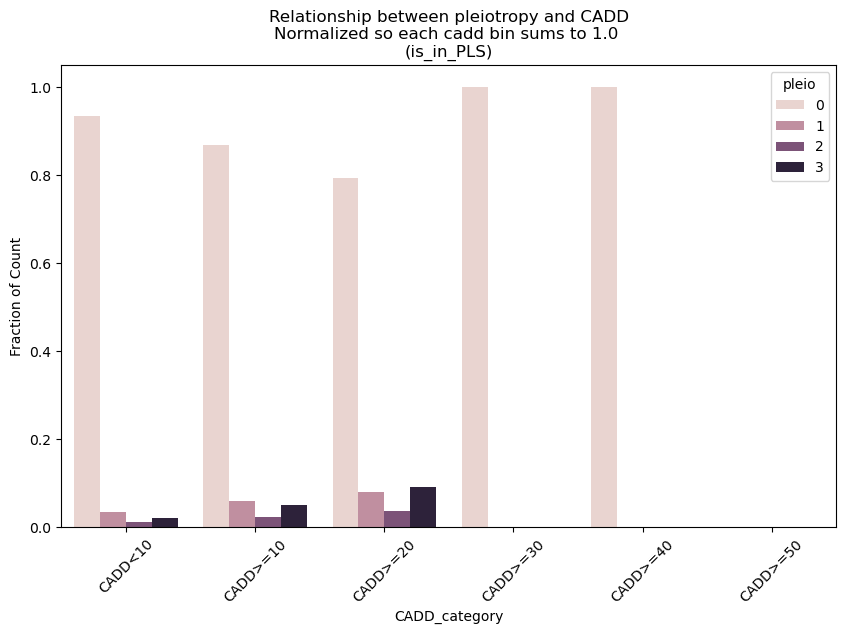

/tmp/ipykernel_3187902/2313554059.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


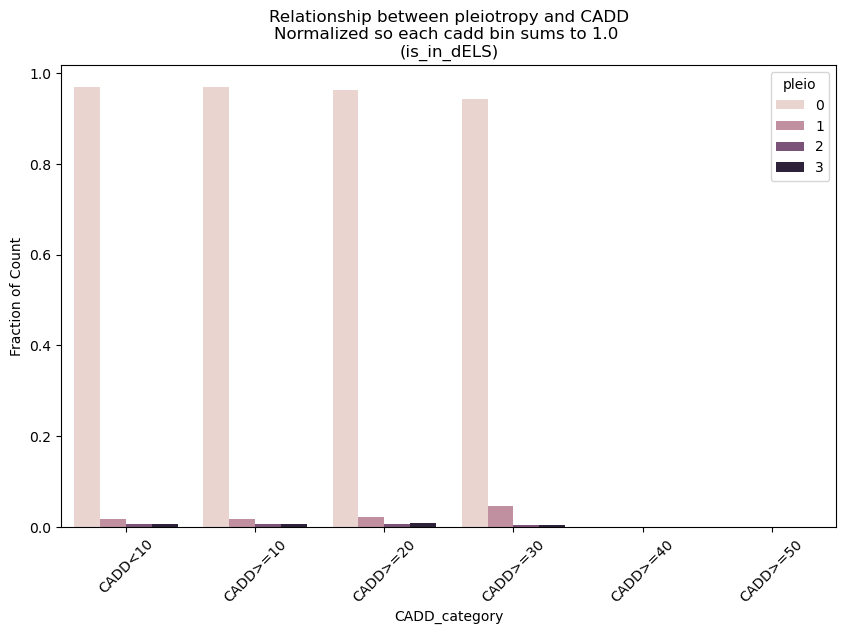

/tmp/ipykernel_3187902/2313554059.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


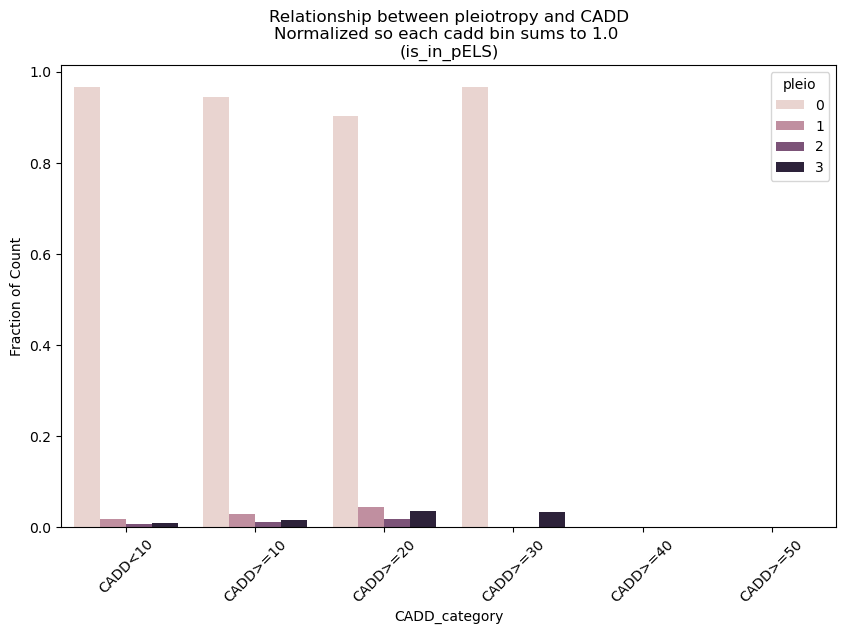

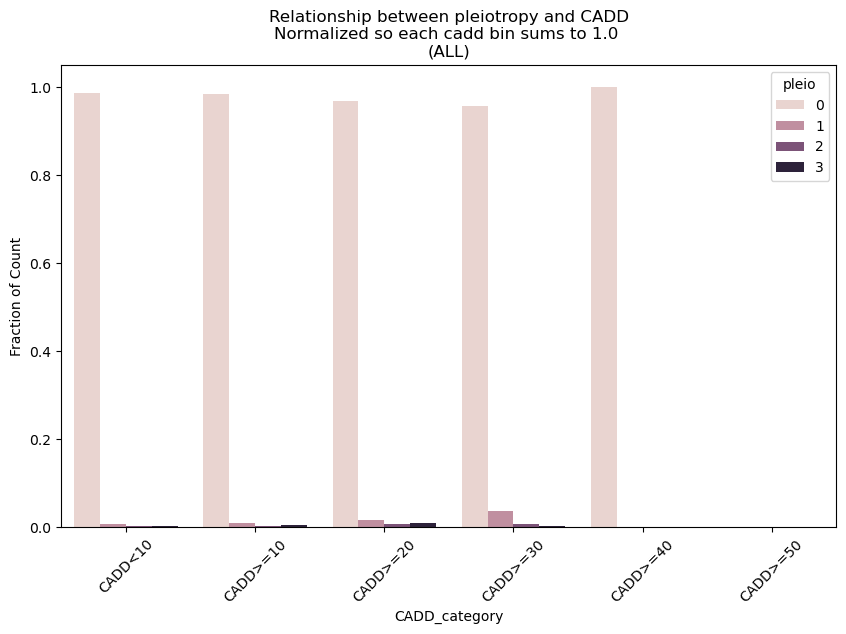

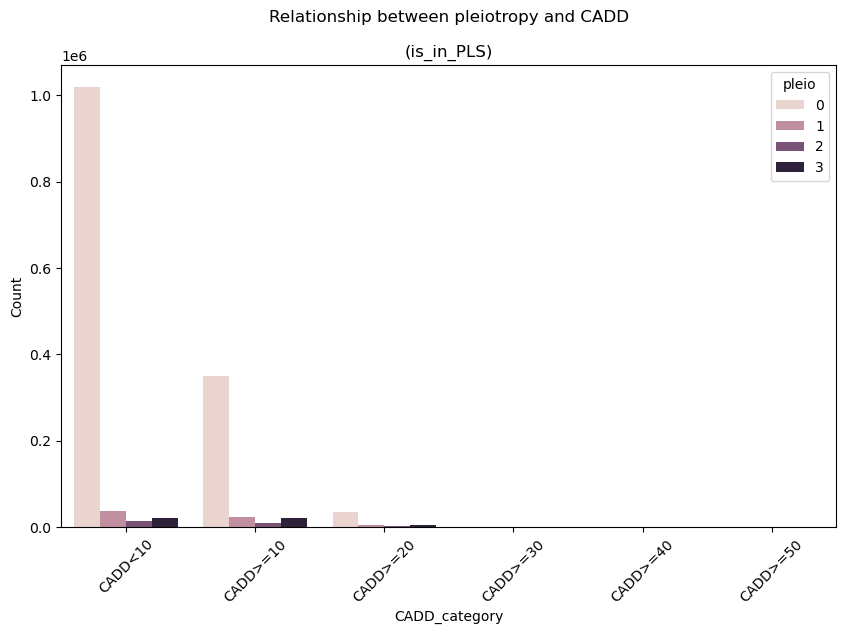

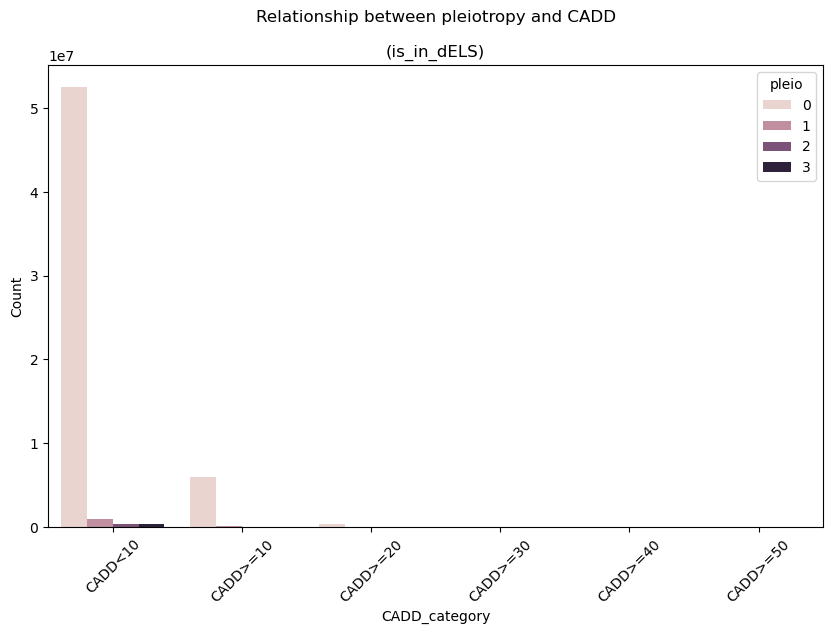

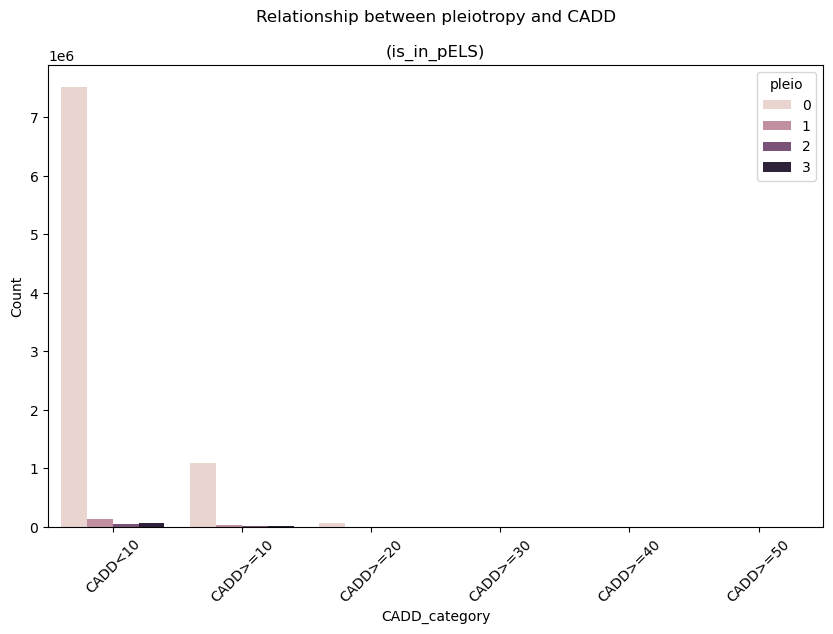

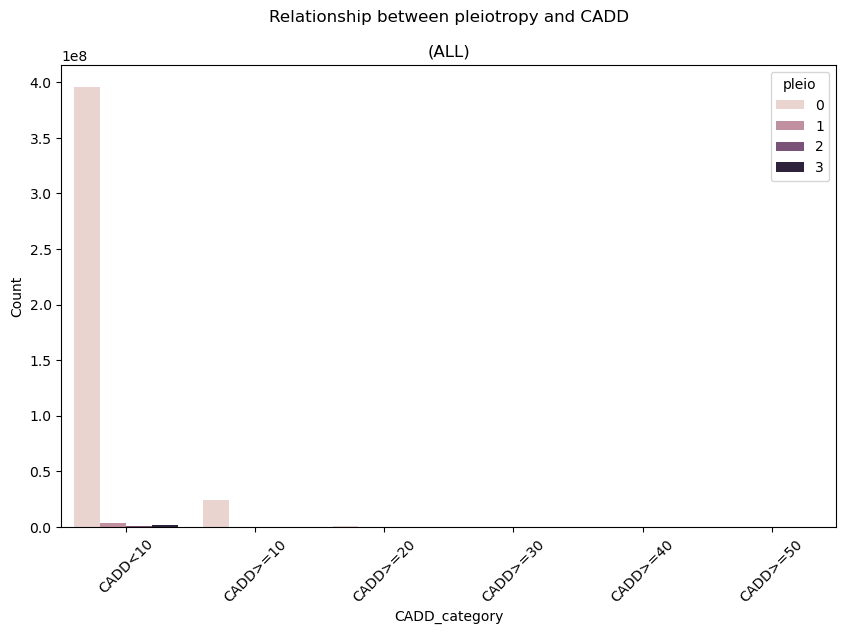

In [76]:
for norm in [True,False]:
    for var in GC.genome_regions:
        plot_pleio(df=cadd_pleio,genomic_region=var,normalize=norm)